# Cifar-10 이미지 분류
## 전체 데이터중 10%만 사용
### 출처: [Achieving 90% accuracy in Object Recognition ](https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/)

#### CIFAR10 데이터 로드

In [1]:
from keras.datasets import cifar10

(X_train, y_train0), (X_test, y_test0) = cifar10.load_data()
print(X_train.shape, X_train.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test.shape, X_test.dtype)
print(y_test0.shape, y_test0.dtype)

Using TensorFlow backend.


(50000, 32, 32, 3) uint8
(50000, 1) uint8
(10000, 32, 32, 3) uint8
(10000, 1) int32


#### 데이터 확인

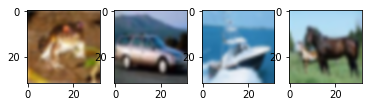

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

#### 자료형 변환 및 스케일링
- X: 실수형으로 정규화
- Y: 1-hot encoding
    * airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

In [3]:
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

print(X_train.shape, X_train.dtype)

(50000, 32, 32, 3) float32


In [4]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:4]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#### 자료의 일부만 사용하여 모델 테스트 하기

In [5]:
from sklearn.model_selection import train_test_split

seed = 0
X_train, X_test, Y_train, Y_test = train_test_split(X_test, Y_test, 
                                                    test_size=.2, random_state=seed)

#### 모형 구현

In [11]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.layers import Activation, BatchNormalization
from keras.regularizers import l2
import numpy as np

np.random.seed(0)

In [14]:
weight_decay = 1e-4
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=l2(weight_decay), 
                 input_shape=X_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [16]:
import keras
opt_rms = keras.optimizers.rmsprop(lr=0.001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])

In [17]:
'''
model.fit_generator(datagen.flow(X_train, Y_train, batch_size=50),
                    steps_per_epoch=X_train.shape[0] // 50, epochs=125,
                    verbose=1, validation_data=(X_test, Y_test),
                    callbacks=[LearningRateScheduler(lr_schedule)])
'''
history = model.fit(X_train, Y_train, epochs=50, batch_size=50, 
                    validation_data=(X_test, Y_test), verbose=2)

W0820 12:21:47.281949  3996 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 8000 samples, validate on 2000 samples
Epoch 1/50
 - 70s - loss: 2.6156 - acc: 0.3064 - val_loss: 2.0105 - val_acc: 0.4190
Epoch 2/50
 - 69s - loss: 1.9143 - acc: 0.4229 - val_loss: 1.9799 - val_acc: 0.4605
Epoch 3/50
 - 69s - loss: 1.6218 - acc: 0.5003 - val_loss: 1.5296 - val_acc: 0.5190
Epoch 4/50
 - 70s - loss: 1.3880 - acc: 0.5593 - val_loss: 1.4693 - val_acc: 0.5725
Epoch 5/50
 - 69s - loss: 1.2274 - acc: 0.6155 - val_loss: 1.8268 - val_acc: 0.5105
Epoch 6/50
 - 69s - loss: 1.0997 - acc: 0.6463 - val_loss: 1.2404 - val_acc: 0.6260
Epoch 7/50
 - 70s - loss: 1.0106 - acc: 0.6845 - val_loss: 1.1576 - val_acc: 0.6310
Epoch 8/50
 - 69s - loss: 0.9271 - acc: 0.7073 - val_loss: 1.4299 - val_acc: 0.6335
Epoch 9/50
 - 69s - loss: 0.8585 - acc: 0.7241 - val_loss: 1.2023 - val_acc: 0.6615
Epoch 10/50
 - 69s - loss: 0.7773 - acc: 0.7540 - val_loss: 1.1080 - val_acc: 0.6690
Epoch 11/50
 - 69s - loss: 0.7380 - acc: 0.7700 - val_loss: 1.1333 - val_acc: 0.6820
Epoch 12/50
 - 69s - loss:

In [20]:
#testing
scores = model.evaluate(X_test, Y_test, batch_size=50, verbose=2)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100, scores[0]))


Test result: 72.900 loss: 1.506


In [21]:
# 테스트 정확도 출력 
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

2000/2000 [==============================] - 5s 2ms/step

 Test Accuracy: 0.7290


In [22]:
# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

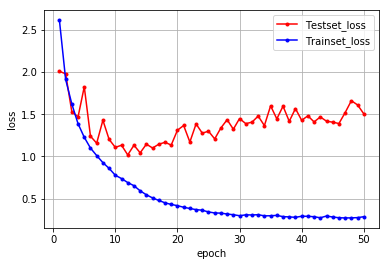

In [23]:
# 그래프로 표현
x_len = np.arange(1, len(y_loss)+1)
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()